# **Basic circle packing**

> #### เหมือน barplot แต่เป็นขนาดของวงกลมแทนที่จะเป็นความกว้างของ plot 

> #### และก็คล้ายกับ bubbleplot แต่ x และ y ไม่มีความสัมพันธ์ต่อกัน

> #### สามารถสร้างโดย **geom_polygon()**

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'packcircles' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\RtmpcvFaMT\downloaded_packages


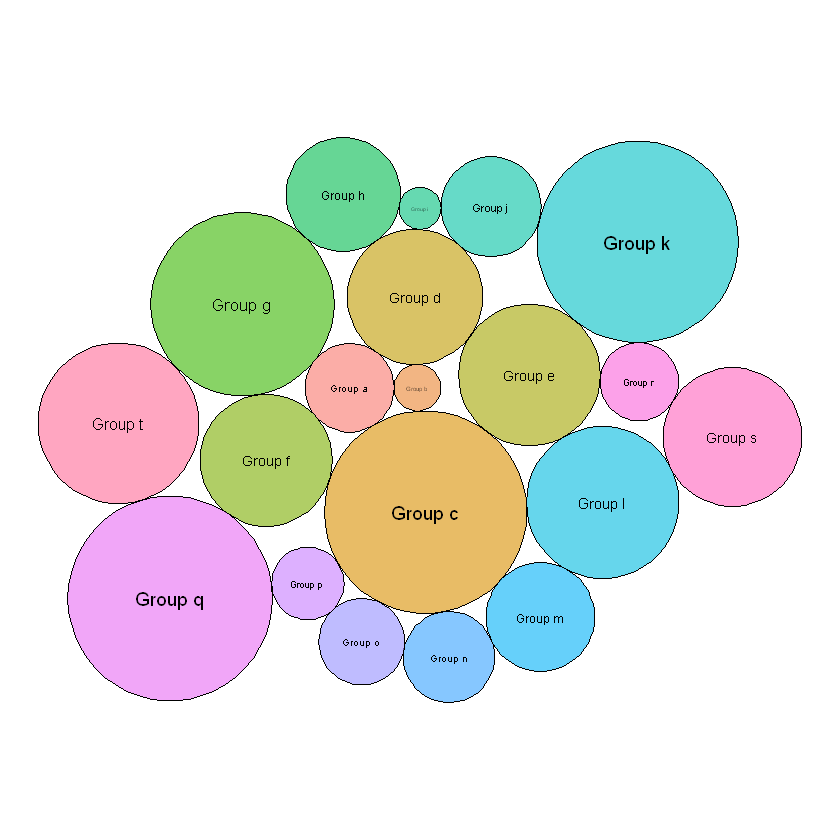

In [4]:
install.packages("packcircles")
# Libraries
library(packcircles)
library(ggplot2)
 
# Create data
data <- data.frame(group=paste("Group", letters[1:20]), value=sample(seq(1,100),20)) 
 
# Generate the layout. This function return a dataframe with one line per bubble. 
# It gives its center (x and y) and its radius, proportional of the value
packing <- circleProgressiveLayout(data$value, sizetype='area')
 
# We can add these packing information to the initial data frame
data <- cbind(data, packing)
 
# Check that radius is proportional to value. We don't want a linear relationship, since it is the AREA that must be proportionnal to the value
# plot(data$radius, data$value)
 
# The next step is to go from one center + a radius to the coordinates of a circle that
# is drawn by a multitude of straight lines.
dat.gg <- circleLayoutVertices(packing, npoints=50)
 
# Make the plot
ggplot() + 
  
  # Make the bubbles
  geom_polygon(data = dat.gg, aes(x, y, group = id, fill=as.factor(id)), colour = "black", alpha = 0.6) +
  
  # Add text in the center of each bubble + control its size
  geom_text(data = data, aes(x, y, size=value, label = group)) +
  scale_size_continuous(range = c(1,4)) +
  
  # General theme:
  theme_void() + 
  theme(legend.position="none") +
  coord_equal()